<a href="https://colab.research.google.com/github/SimonWeidtmann/neue-Assignment/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#connect the file to the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the libraries needes for the regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load the data
data = pd.read_csv('/content/drive/My Drive/My Drive/CreditCard.csv')

In [ ]:
#describing the data
print(data.shape)

(1319, 12)


In [ ]:
#print out the data
print(data.describe())

           reports          age       income        share  expenditure  \
count  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000   
mean      0.456406    33.213103     3.365376     0.068732   185.057071   
std       1.345267    10.142783     1.693902     0.094656   272.218917   
min       0.000000     0.166667     0.210000     0.000109     0.000000   
25%       0.000000    25.416670     2.243750     0.002316     4.583333   
50%       0.000000    31.250000     2.900000     0.038827   101.298300   
75%       0.000000    39.416670     4.000000     0.093617   249.035800   
max      14.000000    83.500000    13.500000     0.906320  3099.505000   

        dependents       months   majorcards       active  
count  1319.000000  1319.000000  1319.000000  1319.000000  
mean      0.993935    55.267627     0.817286     6.996967  
std       1.247745    66.271746     0.386579     6.305812  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000    12.000000  

In [ ]:
#check for missing values --> none of the variables has any missing values
print(data.isnull().sum())

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64


In [ ]:
#check which variables have to be transformed into numerical variables (object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [ ]:
#convertion into numerical variables
data['card'] = data['owner'].map({'yes': 1, 'no': 0})
data['owner'] = data['owner'].map({'yes': 1, 'no': 0})
data['selfemp'] = data['selfemp'].map({'yes': 1, 'no': 0})

In [ ]:
#no need to fill in missing information, as there was no data mising

In [ ]:
#import necessary libraries to be able to construct the regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
#X = all independent variables, Y = the dependent variable
X = data.drop('card', axis=1)
Y = data['card'].map({'yes': 1, 'no': 0})

In [ ]:
#define the independent (X) and dependent (Y) variables. income: bank wants clients to have a lot of money, higher income = better; owner:
#homeowners usually have a lot of money, and in case that the client goes bancrupt, he can sell his house; reports: says something
#about if the client is trustworthy.
X = data[['income', 'owner', 'reports']]
y = data['card']

In [ ]:
#20% will be used for testing and 80% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

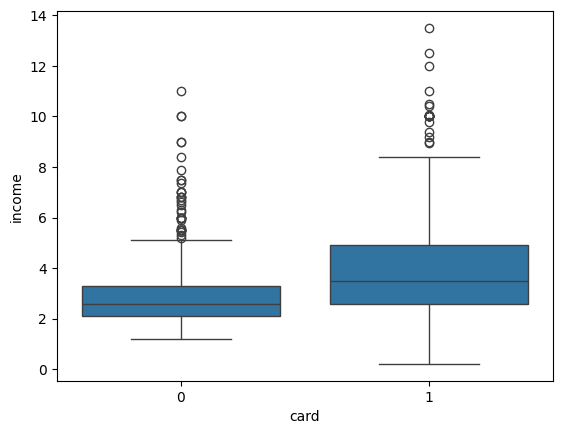

In [ ]:
#boxplot showing that clients with more income tend to be accepted
sns.boxplot(x='card', y='income', data=data)
plt.show()

<Axes: xlabel='income', ylabel='reports'>

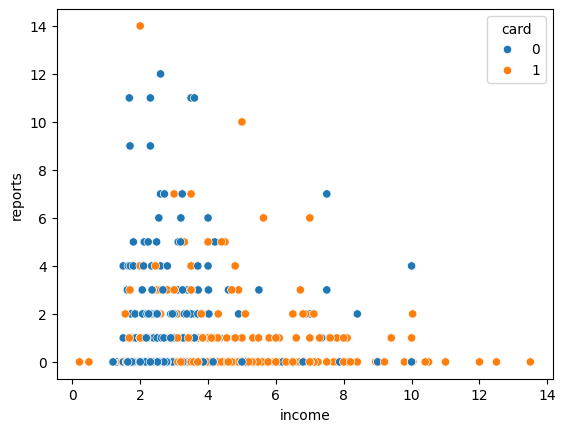

In [ ]:
#plot showing the relation between reports, income and card
sns.scatterplot(x='income', y='reports', hue='card', data=data)

In [ ]:
#X = all independent variables, Y = the dependent variable
X = data.drop('card', axis=1)
Y = data['card'].map({'yes': 1, 'no': 0})

In [ ]:
#Create logistic regression model; logistic, because we have binary classification (yes or  no)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
#makes predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
#convert X_test to a data frame (because we have multidimensional test)
X_test_df = pd.DataFrame(X_test, columns=['income', 'owner', 'reports'])

In [ ]:
#create data frame for the test data and predictions
results = pd.DataFrame({
    'income': X_test_df['income'],
    'owner': X_test_df['owner'],
    'reports': X_test_df['reports'],
    'y_test': y_test,
    'y_pred': y_pred
})


In [ ]:
print(results)

      income  owner  reports  y_test  y_pred
677   1.8142      1        0       1       1
1046  2.0000      0        0       0       0
610   3.0000      1        0       1       1
49    7.0000      1        0       1       1
1284  3.1144      1        0       1       1
...      ...    ...      ...     ...     ...
1176  3.9600      1        0       1       1
1002  5.4900      1        1       1       1
1159  5.1120      1        0       1       1
542   4.0000      0        4       0       0
170   2.4750      0        1       0       0

[264 rows x 5 columns]


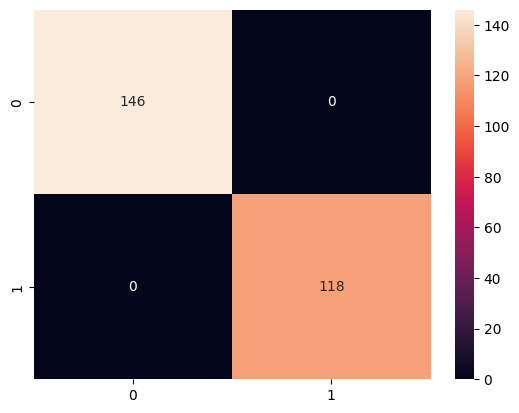

In [ ]:
#create a confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

#results indicates that model perfectly predicts if people get accepted by the bank;
#model could also be overfitting though, meaning that it has learned the specific patterns of the dataset so well that it is not generalizable to unseen data

Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
